# City Crime Analysis

In [1]:
# Preparation for pandas and NumPy
import numpy as np
import pandas as pd
import heapq
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 500)

# Preparation for matplotlib
%matplotlib inline 

In [2]:
crime = pd.read_csv("report.csv")

# 1.Objective of the Proposed Research

You are the founder and CEO of a new startup dedicated to police enforcement optimization. Pick the name of your startup. As part of your customer acquisition efforts, you schedule multiple appointments with executive officers across the nation to showcase your report depicting the most interesting facts about their city. Your report could incorporate information about a specific geography or aggregated nation-wise. For example, you can decide to concentrate on a specific type of crime for all geographies, or to take a specific county and show all the information about it.

Our company's name is **California Living Service Center**. We are here to help those people who are living in California and who are about to settle down in California, choose the best and most suitable city, and also give out information of population and crime in California.

My objective is through analyzing the population and crimes in California, i show the basic information of population and crime in the past and the present, show the trends of population and crime in California, and give my recommmendations for people who need help!

# 2. Data Exploration

## 1）Show structure and information of the dataset

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          2829 non-null   int64  
 1   agency_code          2788 non-null   object 
 2   agency_jurisdiction  2829 non-null   object 
 3   population           2760 non-null   float64
 4   violent_crimes       2794 non-null   float64
 5   homicides            2795 non-null   float64
 6   rapes                2754 non-null   float64
 7   assaults             2753 non-null   float64
 8   robberies            2754 non-null   float64
 9   months_reported      2692 non-null   float64
 10  crimes_percapita     2794 non-null   float64
 11  homicides_percapita  2795 non-null   float64
 12  rapes_percapita      2754 non-null   float64
 13  assaults_percapita   2753 non-null   float64
 14  robberies_percapita  2754 non-null   float64
dtypes: float64(12), int64(1), object(2)
me

### This dataset has 15 columns and 2829 rows

## 2) Show first 5 rows in dataset

In [4]:
crime.head(5)

   report_year agency_code agency_jurisdiction  population  violent_crimes  homicides  rapes  assaults  robberies  months_reported  crimes_percapita  homicides_percapita  rapes_percapita  assaults_percapita  robberies_percapita
0         1975     NM00101     Albuquerque, NM    286238.0          2383.0       30.0  181.0    1353.0      819.0             12.0            832.52                10.48            63.23              472.68               286.13
1         1975     TX22001       Arlington, TX    112478.0           278.0        5.0   28.0     132.0      113.0             12.0            247.16                 4.45            24.89              117.36               100.46
2         1975     GAAPD00         Atlanta, GA    490584.0          8033.0      185.0  443.0    3518.0     3887.0             12.0           1637.44                37.71            90.30              717.10               792.32
3         1975     CO00101          Aurora, CO    116656.0           611.0        7.0   

## 3）Since we only serve and focus on California, let's see how many cases in California

In [5]:
crime_ca  = crime[crime['agency_jurisdiction'].str.contains('CA')]

In [6]:
crime_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 20 to 2818
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   report_year          369 non-null    int64  
 1   agency_code          369 non-null    object 
 2   agency_jurisdiction  369 non-null    object 
 3   population           369 non-null    float64
 4   violent_crimes       369 non-null    float64
 5   homicides            369 non-null    float64
 6   rapes                369 non-null    float64
 7   assaults             369 non-null    float64
 8   robberies            369 non-null    float64
 9   months_reported      360 non-null    float64
 10  crimes_percapita     369 non-null    float64
 11  homicides_percapita  369 non-null    float64
 12  rapes_percapita      369 non-null    float64
 13  assaults_percapita   369 non-null    float64
 14  robberies_percapita  369 non-null    float64
dtypes: float64(12), int64(1), object(2)
me

### We have 369 cases in CA

## 4) Let's take a look at  population information in CA, and how many cities in this dataset

In [7]:
from collections import Counter
Counter(crime_ca["agency_jurisdiction"])

Counter({'Fresno, CA': 41,
         'Long Beach, CA': 41,
         'Los Angeles County, CA': 41,
         'Los Angeles, CA': 41,
         'Oakland, CA': 41,
         'Sacramento, CA': 41,
         'San Diego, CA': 41,
         'San Francisco, CA': 41,
         'San Jose, CA': 41})

In [8]:
ca_case = crime_ca.groupby("agency_jurisdiction")
ca_case.size()

agency_jurisdiction
Fresno, CA                41
Long Beach, CA            41
Los Angeles County, CA    41
Los Angeles, CA           41
Oakland, CA               41
Sacramento, CA            41
San Diego, CA             41
San Francisco, CA         41
San Jose, CA              41
dtype: int64

### There are 9 cities in the dataset of CA, and each one is recorded by 41 times

# 3. One column selection

print 10 largest population with each row in new dataset, and take a loot at each crime information

In [9]:
ca_population =heapq.nlargest(10,crime_ca["population"])

In [10]:
crime_ca[crime_ca["population"].isin(ca_population)]

      report_year agency_code agency_jurisdiction  population  violent_crimes  homicides   rapes  assaults  robberies  months_reported  crimes_percapita  homicides_percapita  rapes_percapita  assaults_percapita  robberies_percapita
2030         2004     CA01942     Los Angeles, CA   3864018.0         42786.0      518.0  1131.0   26956.0    14181.0             12.0           1107.29                13.41            29.27              697.62               367.00
2099         2005     CA01942     Los Angeles, CA   3871077.0         31767.0      489.0  1105.0   16376.0    13797.0             12.0            820.62                12.63            28.55              423.03               356.41
2168         2006     CA01942     Los Angeles, CA   3879455.0         30526.0      480.0  1059.0   14634.0    14353.0             12.0            786.86                12.37            27.30              377.22               369.97
2237         2007     CA01942     Los Angeles, CA   3870487.0         27

#### As we can see, the cases with 10 largest population are all in Los Angeles, and looks like some crime is decreasing, and the population in LA is increasing too. <br>
#### And how about other cities?

# 4. Sort

In this section, let's take a loot at crimes per capita in each city. Then compare top 5 city and bottom 5 cities respectively, to see which cities are more dangerous, which are safer.

Create new dataset that only have columns - report_year, agency_jurisdiction, population, crimes_percapita, homicides_percapita, rapes_percapita, assaults_percapita, robberies_percapita

In [11]:
new_crime_ca = crime_ca.loc[:,["report_year","agency_jurisdiction","population","crimes_percapita"]]

In [12]:
crime_ca_sort = new_crime_ca.sort_values(by = "crimes_percapita",ascending=False)

In [13]:
crime_ca_sort.head(10)

      report_year agency_jurisdiction  population  crimes_percapita
1216         1992         Oakland, CA    386086.0           2626.36
1285         1993         Oakland, CA    377037.0           2601.60
1133         1991     Los Angeles, CA   3558316.0           2525.77
1147         1991         Oakland, CA    379995.0           2495.82
1202         1992     Los Angeles, CA   3615355.0           2459.48
1064         1990     Los Angeles, CA   3485398.0           2404.57
1271         1993     Los Angeles, CA   3525317.0           2374.28
1423         1995         Oakland, CA    368771.0           2256.96
995          1989     Los Angeles, CA   3441449.0           2246.06
388          1980         Oakland, CA    338721.0           2224.84

In [14]:
crime_ca_sort.tail(10)

      report_year agency_jurisdiction  population  crimes_percapita
2747         2014       San Diego, CA   1368690.0            380.95
2059         2004        San Jose, CA    908712.0            371.84
1990         2003        San Jose, CA    909890.0            371.25
2611         2012        San Jose, CA    976459.0            363.25
2404         2009        San Jose, CA    954009.0            360.48
2473         2010        San Jose, CA    945942.0            339.87
2542         2011        San Jose, CA    957062.0            334.98
2818         2015        San Jose, CA   1031458.0            329.63
2680         2013        San Jose, CA    992143.0            324.05
2749         2014        San Jose, CA   1009679.0            321.09

#### Interesting fact: Oakland and LA in 1990s are the most dangerous cities in California, and San Jose in 2010s is the safest city in California!

# 5. Series

We create a new dataset whose years >= 2010 and a new one whose years < 2010

In [15]:
crime_ca_m2010 = crime_ca[crime_ca["report_year"]>=2010]
crime_ca_l2010 = crime_ca[crime_ca["report_year"]<2010]

In [16]:
crime_ca_sort_m2010 = crime_ca_m2010.sort_values(by = "crimes_percapita",ascending=False)
crime_ca_sort_l2010 = crime_ca_l2010.sort_values(by = "crimes_percapita",ascending=False)

1)Let take a look at top 10 cities with highest crimes in 2010s

In [17]:
crime_ca_sort_m2010.agency_jurisdiction.head(10)

2596          Oakland, CA
2665          Oakland, CA
2734          Oakland, CA
2527          Oakland, CA
2458          Oakland, CA
2803          Oakland, CA
2468       Sacramento, CA
2679    San Francisco, CA
2748    San Francisco, CA
2817    San Francisco, CA
Name: agency_jurisdiction, dtype: object

2)Let take a look at top 10 cities with highest crimes before 2010

In [18]:
crime_ca_sort_l2010.agency_jurisdiction.head(10)

1216        Oakland, CA
1285        Oakland, CA
1133    Los Angeles, CA
1147        Oakland, CA
1202    Los Angeles, CA
1064    Los Angeles, CA
1271    Los Angeles, CA
1423        Oakland, CA
995     Los Angeles, CA
388         Oakland, CA
Name: agency_jurisdiction, dtype: object

### Comparing with 1) and 2), we can get that Oakland, Sacramento, San Francisco are the top 3 cities with high crimes per capita in 2010s, and LA looks like safer comparing with itself in the history.

3)Let's take a look at crimes_percapita in 2010s

In [19]:
crime_ca_sort_m2010.crimes_percapita.head(10)

2596    1993.31
2665    1976.79
2734    1685.39
2527    1682.70
2458    1603.95
2803    1442.50
2468     881.48
2679     847.14
2748     795.14
2817     776.82
Name: crimes_percapita, dtype: float64

4)Let's take a look at crimes_percapita before 2010

In [20]:
crime_ca_sort_l2010.crimes_percapita.head(10)

1216    2626.36
1285    2601.60
1133    2525.77
1147    2495.82
1202    2459.48
1064    2404.57
1271    2374.28
1423    2256.96
995     2246.06
388     2224.84
Name: crimes_percapita, dtype: float64

### In a conclusion, the crimes are becoming fewer and fewer from past to the present.

5)Let's focus on **LA**

In [21]:
crime_ca_sort_m2010[crime_ca_sort_m2010["agency_jurisdiction"] == "Los Angeles, CA"].population.head(5)

2789    3962726.0
2444    3792621.0
2513    3837207.0
2720    3906772.0
2582    3855122.0
Name: population, dtype: float64

In [22]:
crime_ca_sort_l2010[crime_ca_sort_l2010["agency_jurisdiction"] == "Los Angeles, CA"].population.head(5)

1133    3558316.0
1202    3615355.0
1064    3485398.0
1271    3525317.0
995     3441449.0
Name: population, dtype: float64

In [23]:
crime_ca_sort_m2010[crime_ca_sort_m2010["agency_jurisdiction"] == "Los Angeles, CA"].crimes_percapita.head(5)

2789    634.82
2444    566.47
2513    522.39
2720    490.71
2582    481.10
Name: crimes_percapita, dtype: float64

In [24]:
crime_ca_sort_l2010[crime_ca_sort_l2010["agency_jurisdiction"] == "Los Angeles, CA"].crimes_percapita.head(5)

1133    2525.77
1202    2459.48
1064    2404.57
1271    2374.28
995     2246.06
Name: crimes_percapita, dtype: float64

## As a conclusion, Los Angeles has the magnificant changes in crimes per capita comparing with the years before 2010, and the population is increasing!

# 6. Plot

I will plot 9 cities - LA, San Jose, Oakland, San Diego and their crimes per capita!

In [25]:
LA = crime_ca[crime_ca["agency_jurisdiction"] == "Los Angeles, CA"]
SJ = crime_ca[crime_ca["agency_jurisdiction"] == "San Jose, CA"]
Oak = crime_ca[crime_ca["agency_jurisdiction"] == "Oakland, CA"]
SD = crime_ca[crime_ca["agency_jurisdiction"] == "San Diego, CA"]
Fr = crime_ca[crime_ca["agency_jurisdiction"] == "Fresno, CA"]
LB = crime_ca[crime_ca["agency_jurisdiction"] == "Long Beach, CA"]
LAC = crime_ca[crime_ca["agency_jurisdiction"] == "Los Angeles County, CA"]
Sa = crime_ca[crime_ca["agency_jurisdiction"] == "Sacramento, CA"]
SF = crime_ca[crime_ca["agency_jurisdiction"] == "San Francisco, CA"]

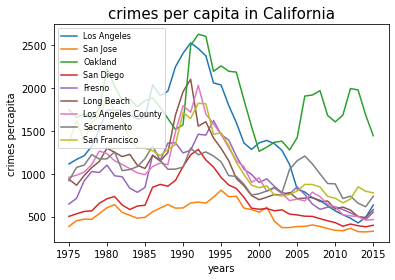

In [26]:
import matplotlib.pyplot as plt
import matplotlib
plt.plot(LA.report_year,LA.crimes_percapita)
plt.plot(SJ.report_year,SJ.crimes_percapita)
plt.plot(Oak.report_year,Oak.crimes_percapita)
plt.plot(SD.report_year,SD.crimes_percapita)
plt.plot(Fr.report_year,Fr.crimes_percapita)
plt.plot(LB.report_year,LB.crimes_percapita)
plt.plot(LAC.report_year,LAC.crimes_percapita)
plt.plot(Sa.report_year,Sa.crimes_percapita)
plt.plot(SF.report_year,SF.crimes_percapita)
plt.xlabel("years", fontsize=10)
plt.ylabel("crimes percapita", fontsize=10)
plt.title("crimes per capita in California",fontsize=15)
plt.legend(["Los Angeles","San Jose","Oakland","San Diego","Fresno","Long Beach","Los Angeles County","Sacramento","San Francisco"],loc = "upper left",fontsize=8)
plt.show()

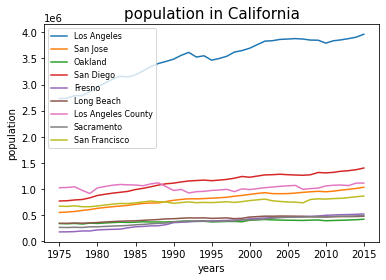

In [27]:
plt.plot(LA.report_year,LA.population)
plt.plot(SJ.report_year,SJ.population)
plt.plot(Oak.report_year,Oak.population)
plt.plot(SD.report_year,SD.population)
plt.plot(Fr.report_year,Fr.population)
plt.plot(LB.report_year,LB.population)
plt.plot(LAC.report_year,LAC.population)
plt.plot(Sa.report_year,Sa.population)
plt.plot(SF.report_year,SF.population)
plt.xlabel("years", fontsize=10)
plt.ylabel("population", fontsize=10)
plt.title("population in California",fontsize=15)
plt.legend(["Los Angeles","San Jose","Oakland","San Diego","Fresno","Long Beach","Los Angeles County","Sacramento","San Francisco"],loc = "upper left",fontsize=8)
plt.show()

As we can see, every cities are keeping stable slopes except Oakland, which means **Oakland is still the most dangerous city** in California. **San Jose and San Diego are the safest cities** in California. However, except Oakland, other 8 cities are becomming pretty safe!

As for population, every city is increasing. **Los Angeles has the greatest poplation** in California, and with the pretty low crime. **Oakland has the lowest population**, with the highest crime possibility!

# 7. Summary

From **No.2 section**, we got that there are 9 cities from California in dataset record!<br>
From **No.3 section**, we got that the population in Los Angeles is increasing, and the crime is decreasing - a huge downhill.<br>
From **No.4 section**, we sorted dataset by column crime percapita, and found that in the past, Los Angeles and Oakland are the top 2 most dangerous cities in California, and San Jose is the safest city.<br>
From **No.5 section**, we focused on the years after 2010, then we found that Oakland, Sacramento, San Francisco are the top 3 cities with high crimes per capita in 2010s, and LA looks like safer comparing with itself in the history. Also for crimes in California, the crimes are becoming less and less from past to the present.<br>
From **No.6 section**, we looked through straightly in 2 graphs, to concluded and proved that Oakland is still the most dangerous city in California. San Jose and San Diego are the safest cities in California. Los Angeles has the greatest poplation in California, and with the pretty low crime. Oakland has the lowest population, with the highest crime possibility!

# 8. Recommendations

As a service center, we recommend that people who are living in Oakland right now, should stay careful, try to keep away from those things that may lead to occur crime and protect yourselves. For people who are living in other city, you should be fine in any time, but still keep eyes open!<br>
And for those of who are planning to settle in California, if you prefer noise, excitement, more people, more fun, but still safe, you should choose Los Angeles. And for those who prefer peaceful, quiet, fewer people, you could choose any city except Los Angeles and Oakland. And if you are not forced, just don't go to Oakland!